In [102]:
import pandas as pd
import psycopg2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [103]:
#conectando ao banco de dados
conn = psycopg2.connect(dbname="dfo2vqe9hs2knm", 
                        user="zgbodaynfjorzt",
                        password="d2b11c0c6039df67f39d22f680fb92a843a1b652e3d5b692f6670c0a2abc2804", 
                        host='ec2-3-222-74-92.compute-1.amazonaws.com', 
                        port='5432')

In [104]:
sql1 = "select * from forms"
sql2 = "select * from order_items"
sql3 = "select * from orders"

In [105]:
data1 = pd.read_sql_query(sql1, conn)
data2 = pd.read_sql_query(sql2, conn)
data3 = pd.read_sql_query(sql3, conn)
conn = None

In [106]:
pd.set_option('display.max_columns',100)

In [107]:
print(data1.shape)
print('-'*60)
print(data2.shape)
print('-'*60)
print(data3.shape)

(427950, 23)
------------------------------------------------------------
(211663, 6)
------------------------------------------------------------
(55078, 12)


In [108]:
#Preenchimento do formulário
data1.head()

,id_form,id_cliente,data,sistema_operacional,navegador,localizacao,locale,cidade,estado,qtde_lavagem_semana,utm_source,tipo_cabelo,comprimento,tipo_fios,procedimentos,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,caracteristica,faixa_etaria,efeitos_desejados,fragancia
0,c7d453c9c01223a42968d9fe136047,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,Safari,"São Paulo, Sao Paulo",BR,SÃO PAULO,SAO PAULO,4,None,Tipo 2,Raíz exposta,Pontas duplas,Nenhum,Há 2 semanas,Celíaca,Frequente,Nunca,Característica 1,25 a 34,Efeito 7,Rosas
1,72830da153824af486be15cd48b3f3,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,Chrome,"Ribeirão Preto, Sao Paulo",BR,RIBEIRÃO PRETO,SAO PAULO,7,None,Tipo 4,Muito curto,Perfeitos,Todos acima,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,Característica 6,55 a 64,Efeito 1,Eucalipto
2,d101fc0075dac29db1168cfc61ad44,c3344fad450ee424700d,2022-01-04 19:34:05,Android,Chrome,"São Paulo, Sao Paulo",BR,SÃO PAULO,SAO PAULO,2,None,Tipo 1,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Nenhuma restrição,Raramente,Regularmente,Característica 7,2 a 10,Efeito 7,Rosas
3,0957fb9d7be36b4d079b6582bb6785,8105e34124e90300d8b5,2022-01-05 18:29:41,Android,Chrome,"Manchester, England",BR,MANCHESTER,ENGLAND,5,None,Tipo 1,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Celíaca,Raramente,Regularmente,Característica 7,25 a 34,Efeito 7,Rosas
4,ba73bdcc6c063ab08b533eae5505eb,636382f3f545eec3fe97,2022-01-07 11:44:31,Android,Chrome,"Tijucas, Santa Catarina",BR,TIJUCAS,SANTA CATARINA,4,facebook,Tipo 3,Muito curto,Rebeldes,Tintura,Há 1 semana,Celíaca,Sempre,Nunca,Característica 10,18 a 24,Efeito 7,Eucalipto


In [109]:
data1.isnull().sum()

id_form                    0
id_cliente                 0
data                       0
sistema_operacional        0
navegador              93114
localizacao                0
locale                     0
cidade                 14121
estado                   198
qtde_lavagem_semana        0
utm_source             55130
tipo_cabelo                0
comprimento                0
tipo_fios                  0
procedimentos              0
tempo_procedimento         0
dieta                      0
atividade_fisica           0
frequencia_estresse        0
caracteristica             0
faixa_etaria               0
efeitos_desejados        979
fragancia                  0
dtype: int64

In [110]:
data1.drop(['localizacao','navegador','utm_source'], axis = 1, inplace = True)

In [111]:
data1.isnull().sum()

id_form                    0
id_cliente                 0
data                       0
sistema_operacional        0
locale                     0
cidade                 14121
estado                   198
qtde_lavagem_semana        0
tipo_cabelo                0
comprimento                0
tipo_fios                  0
procedimentos              0
tempo_procedimento         0
dieta                      0
atividade_fisica           0
frequencia_estresse        0
caracteristica             0
faixa_etaria               0
efeitos_desejados        979
fragancia                  0
dtype: int64

In [112]:
data1['cidade'] = data1['cidade'].replace(np.NaN, 0)

In [113]:
data1.isnull().sum()

id_form                  0
id_cliente               0
data                     0
sistema_operacional      0
locale                   0
cidade                   0
estado                 198
qtde_lavagem_semana      0
tipo_cabelo              0
comprimento              0
tipo_fios                0
procedimentos            0
tempo_procedimento       0
dieta                    0
atividade_fisica         0
frequencia_estresse      0
caracteristica           0
faixa_etaria             0
efeitos_desejados      979
fragancia                0
dtype: int64

In [114]:
cidade_0  = data1[data1.cidade == 0]
cidade_0

,id_form,id_cliente,data,sistema_operacional,locale,cidade,estado,qtde_lavagem_semana,tipo_cabelo,comprimento,tipo_fios,procedimentos,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,caracteristica,faixa_etaria,efeitos_desejados,fragancia
11,0b257e7d345e0a9580ce19523e9c6f,0fa7099bfbdcf0898703,2022-01-12 19:56:07,Android,BR,0,AMAZONAS,6,Tipo 3,Raíz exposta,Rebeldes,Todos acima,Há mais de 1 mês,Celíaca,Raramente,Uma vez por mês,Característica 10,35 a 44,Efeito 7,Rosas
12,03d529a2e13d56b018c12c8e6898fe,6ac5bdde5336ae228d1f,2022-01-13 07:50:04,Android,BR,0,NULL,6,Tipo 4,Muito curto,Rebeldes,Tintura,Não houve procedimentos,Nenhuma restrição,Raramente,Nunca,Característica 2,45 a 54,Efeito 7,Eucalipto
15,d254b7708eabc100de8e6fe2c3b025,d5848fa7b2b8156405ab,2022-01-14 23:54:56,iOS,BR,0,NULL,1,Tipo 1,Longo,Pontas duplas,Corte agressivo,Há 2 semanas,Nenhuma restrição,Raramente,Nunca,"Característica 5, Característica 8",25 a 34,"Efeito 1, Efeito 7",Rosas
27,8788b81f00eab52976287772368e4c,5e2c9c9111afed73efe9,2022-01-11 11:13:23,Mac OS,BR,0,NULL,4,Tipo 2,Muito curto,Rebeldes,Tintura,Há 1 semana,Celíaca,N/C,Nunca,Característica 9,18 a 24,Efeito 10,Eucalipto
123,de3ad6a2343ac45b28c630e004598d,ecb0203637f908431f4e,2022-01-27 14:24:33,iOS,BR,0,NULL,4,Tipo 4,Raíz exposta,Rebeldes,Nenhum,Há 1 semana,Celíaca,Raramente,Nunca,Característica 1,18 a 24,"Efeito 6, Efeito 7, Efeito 4, Efeito 5",Rosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427934,5524c754593a28f8fc7d522525114e,4f81aff799d07dc377dc,2022-02-26 17:17:03,Android,BR,0,None,4,Tipo 2,Raíz exposta,Rebeldes,Nenhum,Há 1 semana,Intolerante a lactose,Raramente,Nunca,Característica 2,55 a 64,Efeito 7,Flores do campo
427936,1489736d432f145354f02979f51a1b,8b5108b632c3771f9b6f,2022-02-26 17:22:14,Android,BR,0,None,4,Tipo 1,Raíz exposta,Rebeldes,Todos acima,Há mais de 1 mês,Intolerante a lactose,Frequente,Nunca,Característica 9,45 a 54,"Efeito 7, Efeito 1, Efeito 5, Efeito 4",Eucalipto
427937,31bc1557ee0e43cb822180564334bc,b7b9c06cb13fcfb6fece,2022-02-26 17:29:45,Android,BR,0,None,4,Tipo 3,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Celíaca,Raramente,Uma vez por mês,Característica 1,25 a 34,"Efeito 7, Efeito 8, Efeito 4, Efeito 1, Efeito 5",Flores do campo
427939,21ab8b79c33c84c320c2829ae2b666,689ad38958e07d04150e,2022-02-26 17:54:47,iOS,BR,0,None,5,Tipo 2,Extra longo,Perfeitos,Todos acima,Há mais de 1 mês,Leve,Raramente,Nunca,Característica 3,18 a 24,Efeito 2,Flores do campo


In [115]:
print(cidade_0.estado.value_counts())

 NULL                    10004
 MATO GROSSO               812
 SAO PAULO                 442
 AMAZONAS                  420
 PARA                      260
 GOIAS                     230
 MINAS GERAIS              198
 MATO GROSSO DO SUL        187
 PERNAMBUCO                180
 BAHIA                     176
 RONDONIA                  118
 MARANHAO                  110
 PARANA                    106
 SANTA CATARINA             86
 RIO GRANDE DO SUL          76
 ESPIRITO SANTO             74
 RIO DE JANEIRO             63
 PIAUI                      59
 TOCANTINS                  52
 ALAGOAS                    47
 FEDERAL DISTRICT           47
 CEARA                      47
 SERGIPE                    37
 RIO GRANDE DO NORTE        19
 PARAÍBA                    15
 ACRE                       13
 LUXEMBOURG                  8
 MASSACHUSETTS               5
 TEXAS                       3
 NORTH CAROLINA              3
 DISTRICT OF COLUMBIA        3
 DISTRICT OF SETÚBAL         2
 SARDINI

In [116]:
data1['estado'] = data1['estado'].replace(' NULL', 0)

In [117]:
estado_0 = data1[data1.estado == 0]
estado_0

,id_form,id_cliente,data,sistema_operacional,locale,cidade,estado,qtde_lavagem_semana,tipo_cabelo,comprimento,tipo_fios,procedimentos,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,caracteristica,faixa_etaria,efeitos_desejados,fragancia
12,03d529a2e13d56b018c12c8e6898fe,6ac5bdde5336ae228d1f,2022-01-13 07:50:04,Android,BR,0,0,6,Tipo 4,Muito curto,Rebeldes,Tintura,Não houve procedimentos,Nenhuma restrição,Raramente,Nunca,Característica 2,45 a 54,Efeito 7,Eucalipto
15,d254b7708eabc100de8e6fe2c3b025,d5848fa7b2b8156405ab,2022-01-14 23:54:56,iOS,BR,0,0,1,Tipo 1,Longo,Pontas duplas,Corte agressivo,Há 2 semanas,Nenhuma restrição,Raramente,Nunca,"Característica 5, Característica 8",25 a 34,"Efeito 1, Efeito 7",Rosas
27,8788b81f00eab52976287772368e4c,5e2c9c9111afed73efe9,2022-01-11 11:13:23,Mac OS,BR,0,0,4,Tipo 2,Muito curto,Rebeldes,Tintura,Há 1 semana,Celíaca,N/C,Nunca,Característica 9,18 a 24,Efeito 10,Eucalipto
123,de3ad6a2343ac45b28c630e004598d,ecb0203637f908431f4e,2022-01-27 14:24:33,iOS,BR,0,0,4,Tipo 4,Raíz exposta,Rebeldes,Nenhum,Há 1 semana,Celíaca,Raramente,Nunca,Característica 1,18 a 24,"Efeito 6, Efeito 7, Efeito 4, Efeito 5",Rosas
130,da66365ea501db029e19b01c4c9a4d,c4835fa01105db562a0e,2022-01-03 10:07:24,Android,BR,0,0,1,Tipo 2,Muito curto,Secos,Todos acima,Há mais de 1 mês,Celíaca,Raramente,Nunca,Característica 8,11 a 17,Efeito 2,Rosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427896,0b2c345cabda421f83928b567a2d3c,0149faa2d65f072513ad,2022-02-23 20:24:04,Android,BR,0,0,1,Tipo 4,Muito curto,Secos,Todos acima,Há mais de 1 mês,Celíaca,Sempre,Nunca,"Característica 1, Característica 8",25 a 34,Efeito 1,Flores do campo
427897,f00cd11501ea59d73aaf35c1f7c7bb,baabbd518da230d45822,2022-02-24 12:42:31,iOS,BR,0,0,4,Tipo 1,Muito curto,Pontas duplas,Corte agressivo,Há 2 semanas,Celíaca,Raramente,Uma vez por mês,Característica 8,18 a 24,"Efeito 6, Efeito 3",Eucalipto
427899,0c1a2c56724d2c7b3f180eca4673e8,0c34b02b046f7fd55fd1,2022-02-24 14:14:19,Windows,BR,0,0,1,Tipo 1,Raíz exposta,Pontas duplas,Corte agressivo,Há 1 semana,Nenhuma restrição,Nunca,Nunca,Característica 6,25 a 34,Efeito 7,Eucalipto
427918,0761e08790d306b14a39f309a45683,d8567042881e409905f7,2022-02-26 11:03:52,iOS,BR,0,0,5,Tipo 1,Muito curto,Pontas duplas,Corte agressivo,Há mais de 1 mês,Celíaca,Sempre,Nunca,"Característica 10, Característica 3",11 a 17,"Efeito 1, Efeito 3",Eucalipto


In [118]:
#apagando os estados nulos
data1 = data1.drop(index = estado_0.index)

In [119]:
data1['estado'] = data1['estado'].replace(np.NaN, 0)
estado_0 = data1[data1.estado == 0]
estado_0

,id_form,id_cliente,data,sistema_operacional,locale,cidade,estado,qtde_lavagem_semana,tipo_cabelo,comprimento,tipo_fios,procedimentos,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,caracteristica,faixa_etaria,efeitos_desejados,fragancia
154230,34725a2248cd2e5c19952e576dc684,63ec9980f2a0b0e15761,2022-02-26 16:30:05,iOS,BR,0,0,3,Tipo 2,Longo,Secos,"Tintura, Corte agressivo, Exposição ao sol",Há 2 semanas,Celíaca,Frequente,Uma vez por mês,Característica 3,25 a 34,"Efeito 7, Efeito 2, Efeito 1, Efeito 3",Rosas
154235,b9ae782e93d70f1f1e685cc2211cdd,4ef51c0c84b3cf0a077f,2022-02-26 16:13:05,Android,BR,0,0,4,Tipo 1,Raíz exposta,Perfeitos,Exposição ao sol,Há 2 semanas,Celíaca,Raramente,Nunca,Característica 3,25 a 34,"Efeito 6, Efeito 2, Efeito 10, Efeito 1",Eucalipto
154236,df2f25284be73e83159245074c2b93,d7e5571a52d15b166e22,2022-02-26 16:14:24,Windows,BR,0,0,2,Tipo 2,Muito curto,Perfeitos,Exposição ao sol,Há 2 semanas,Nenhuma restrição,Frequente,Uma vez por mês,"Característica 8, Característica 9, Caracterís...",35 a 44,"Efeito 10, Efeito 1, Efeito 3, Efeito 2",Eucalipto
154237,0fdee1dcf240f701d1dcc9e8c83990,b8ab918cc710dced69b4,2022-02-26 16:14:06,Android,BR,0,0,4,Tipo 4,Raíz exposta,Rebeldes,Todos acima,Há mais de 1 mês,Celíaca,Raramente,Nunca,"Característica 3, Característica 8",25 a 34,"Efeito 6, Efeito 7, Efeito 8, Efeito 3",Flores do campo
154238,258d4923fd7e08ef795f1776124f11,1b14ea2b797bc508ccc7,2022-02-26 16:15:34,Android,BR,0,0,4,Tipo 1,Raíz exposta,Rebeldes,Todos acima,Há mais de 1 mês,Celíaca,Raramente,Uma vez por mês,Característica 3,11 a 17,"Efeito 6, Efeito 7, Efeito 1, Efeito 3",Rosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427934,5524c754593a28f8fc7d522525114e,4f81aff799d07dc377dc,2022-02-26 17:17:03,Android,BR,0,0,4,Tipo 2,Raíz exposta,Rebeldes,Nenhum,Há 1 semana,Intolerante a lactose,Raramente,Nunca,Característica 2,55 a 64,Efeito 7,Flores do campo
427936,1489736d432f145354f02979f51a1b,8b5108b632c3771f9b6f,2022-02-26 17:22:14,Android,BR,0,0,4,Tipo 1,Raíz exposta,Rebeldes,Todos acima,Há mais de 1 mês,Intolerante a lactose,Frequente,Nunca,Característica 9,45 a 54,"Efeito 7, Efeito 1, Efeito 5, Efeito 4",Eucalipto
427937,31bc1557ee0e43cb822180564334bc,b7b9c06cb13fcfb6fece,2022-02-26 17:29:45,Android,BR,0,0,4,Tipo 3,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Celíaca,Raramente,Uma vez por mês,Característica 1,25 a 34,"Efeito 7, Efeito 8, Efeito 4, Efeito 1, Efeito 5",Flores do campo
427939,21ab8b79c33c84c320c2829ae2b666,689ad38958e07d04150e,2022-02-26 17:54:47,iOS,BR,0,0,5,Tipo 2,Extra longo,Perfeitos,Todos acima,Há mais de 1 mês,Leve,Raramente,Nunca,Característica 3,18 a 24,Efeito 2,Flores do campo


In [120]:
data1 = data1.drop(index = estado_0.index)

In [121]:
data1.head()

,id_form,id_cliente,data,sistema_operacional,locale,cidade,estado,qtde_lavagem_semana,tipo_cabelo,comprimento,tipo_fios,procedimentos,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,caracteristica,faixa_etaria,efeitos_desejados,fragancia
0,c7d453c9c01223a42968d9fe136047,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,BR,SÃO PAULO,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Nenhum,Há 2 semanas,Celíaca,Frequente,Nunca,Característica 1,25 a 34,Efeito 7,Rosas
1,72830da153824af486be15cd48b3f3,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,BR,RIBEIRÃO PRETO,SAO PAULO,7,Tipo 4,Muito curto,Perfeitos,Todos acima,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,Característica 6,55 a 64,Efeito 1,Eucalipto
2,d101fc0075dac29db1168cfc61ad44,c3344fad450ee424700d,2022-01-04 19:34:05,Android,BR,SÃO PAULO,SAO PAULO,2,Tipo 1,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Nenhuma restrição,Raramente,Regularmente,Característica 7,2 a 10,Efeito 7,Rosas
3,0957fb9d7be36b4d079b6582bb6785,8105e34124e90300d8b5,2022-01-05 18:29:41,Android,BR,MANCHESTER,ENGLAND,5,Tipo 1,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Celíaca,Raramente,Regularmente,Característica 7,25 a 34,Efeito 7,Rosas
4,ba73bdcc6c063ab08b533eae5505eb,636382f3f545eec3fe97,2022-01-07 11:44:31,Android,BR,TIJUCAS,SANTA CATARINA,4,Tipo 3,Muito curto,Rebeldes,Tintura,Há 1 semana,Celíaca,Sempre,Nunca,Característica 10,18 a 24,Efeito 7,Eucalipto


In [122]:
for col in data1:
    print(data1[col].value_counts(), '\n')

c7d453c9c01223a42968d9fe136047    1
a7e06a957d217ae73ddf4ac783eace    1
afe62e2c8b7602ba56af0f3a045228    1
64b7a30aca6e4be067076afb1e1bdf    1
f41ca19ca88cdc46c1f73190d8b398    1
                                 ..
076ef864915b5ae0b962ccffe43589    1
d666b90ff4ff52c5ca31c634d6e9a9    1
9567a9d7cbb95dcc757ef52b8da42b    1
13acc54a94adc8616b6349c1f438d0    1
91848f24045463652aa6d8be1b1851    1
Name: id_form, Length: 417737, dtype: int64 

62709c86f36f30b99f7f    494
b2b6b959bedce17b90b0    169
b6c0b82cc271fd1203fc    141
fb38e382b080555672ae    115
9a48802d8290d19471f3    113
                       ... 
c23372934bbfdab54671      1
2a71acfe8ea49fd3e545      1
e6895ee91314a63e0bda      1
5f1074b99b84e9acaed2      1
297e9eafad002959382d      1
Name: id_cliente, Length: 299112, dtype: int64 

2022-01-05 13:51:47    5
2022-05-27 14:13:19    5
2022-01-21 14:47:13    4
2022-01-31 17:11:10    4
2022-01-05 21:39:35    4
                      ..
2022-02-24 08:53:21    1
2022-02-24 08:49:31    1
2

In [123]:
#apagando locale pois todos os dados são iguais
data1.drop(['locale'], axis = 1, inplace = True)

In [124]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417737 entries, 0 to 427949
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id_form              417737 non-null  object        
 1   id_cliente           417737 non-null  object        
 2   data                 417737 non-null  datetime64[ns]
 3   sistema_operacional  417737 non-null  object        
 4   cidade               417737 non-null  object        
 5   estado               417737 non-null  object        
 6   qtde_lavagem_semana  417737 non-null  int64         
 7   tipo_cabelo          417737 non-null  object        
 8   comprimento          417737 non-null  object        
 9   tipo_fios            417737 non-null  object        
 10  procedimentos        417737 non-null  object        
 11  tempo_procedimento   417737 non-null  object        
 12  dieta                417737 non-null  object        
 13  atividade_fisi

In [125]:
#criando uma coluna de dia da semana
data1['dia_semana'] = data1['data'].dt.day_name()


In [126]:
data1.head()

,id_form,id_cliente,data,sistema_operacional,cidade,estado,qtde_lavagem_semana,tipo_cabelo,comprimento,tipo_fios,procedimentos,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,caracteristica,faixa_etaria,efeitos_desejados,fragancia,dia_semana
0,c7d453c9c01223a42968d9fe136047,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,SÃO PAULO,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Nenhum,Há 2 semanas,Celíaca,Frequente,Nunca,Característica 1,25 a 34,Efeito 7,Rosas,Monday
1,72830da153824af486be15cd48b3f3,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,RIBEIRÃO PRETO,SAO PAULO,7,Tipo 4,Muito curto,Perfeitos,Todos acima,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,Característica 6,55 a 64,Efeito 1,Eucalipto,Tuesday
2,d101fc0075dac29db1168cfc61ad44,c3344fad450ee424700d,2022-01-04 19:34:05,Android,SÃO PAULO,SAO PAULO,2,Tipo 1,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Nenhuma restrição,Raramente,Regularmente,Característica 7,2 a 10,Efeito 7,Rosas,Tuesday
3,0957fb9d7be36b4d079b6582bb6785,8105e34124e90300d8b5,2022-01-05 18:29:41,Android,MANCHESTER,ENGLAND,5,Tipo 1,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Celíaca,Raramente,Regularmente,Característica 7,25 a 34,Efeito 7,Rosas,Wednesday
4,ba73bdcc6c063ab08b533eae5505eb,636382f3f545eec3fe97,2022-01-07 11:44:31,Android,TIJUCAS,SANTA CATARINA,4,Tipo 3,Muito curto,Rebeldes,Tintura,Há 1 semana,Celíaca,Sempre,Nunca,Característica 10,18 a 24,Efeito 7,Eucalipto,Friday


agrupar
- estados - ok

criar colunas:
- numero_efeitos_desejados - ok
- numero_caracteristica - ok
- numero_procedimentos - ok


Combinar os DF - ok

Criar a classificaçao - ok

apagar
- cidade - ok
- id_form - ok
- id_cliente - ok
- data - ok

In [127]:
print(data1.estado.value_counts()[:30].index.tolist())

[' SAO PAULO', ' MINAS GERAIS', ' RIO DE JANEIRO', ' PARANA', ' RIO GRANDE DO SUL', ' SANTA CATARINA', ' BAHIA', ' CEARA', ' PERNAMBUCO', ' GOIAS', ' FEDERAL DISTRICT', ' MATO GROSSO', ' PARA', ' ESPIRITO SANTO', ' PARAÍBA', ' MATO GROSSO DO SUL', ' RIO GRANDE DO NORTE', ' MARANHAO', ' ALAGOAS', ' AMAZONAS', ' SERGIPE', ' PIAUI', ' RONDONIA', ' TOCANTINS', ' ACRE', ' AMAPA', ' LISBON', ' PORTO', ' RORAIMA', ' ENGLAND']


In [128]:
dados_lisbon = data1[data1.estado == ' LISBON']
dados_lisbon
#381 registros

,id_form,id_cliente,data,sistema_operacional,cidade,estado,qtde_lavagem_semana,tipo_cabelo,comprimento,tipo_fios,procedimentos,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,caracteristica,faixa_etaria,efeitos_desejados,fragancia,dia_semana
3584,1fea32a11cadd5aa3029464374bbd8,49b170fc05383867d263,2022-01-02 20:45:36,Android,PERO PINHEIRO,LISBON,7,Tipo 4,Extra longo,Pontas duplas,Todos acima,Há mais de 1 mês,Nenhuma restrição,Sempre,Uma vez por mês,Característica 3,25 a 34,"Efeito 6, Efeito 7, Efeito 3, Efeito 5",Eucalipto,Sunday
10150,427be77ffb53190e050a992c92effb,891beaadc8bcfa052c35,2022-01-05 12:34:44,iOS,ERICEIRA,LISBON,4,Tipo 1,Muito curto,Rebeldes,"Corte agressivo, Exposição ao sol",Há 2 semanas,Celíaca,Raramente,Uma vez por mês,"Característica 8, Característica 3",18 a 24,"Efeito 6, Efeito 7, Efeito 10, Efeito 1",Rosas,Wednesday
11248,4e0d70feb3d5a22ff196a6039e6614,90ac92b5df15f2d17664,2022-01-05 14:09:20,Windows,TORRES VEDRAS,LISBON,4,Tipo 1,Muito curto,Secos,Exposição ao sol,Há mais de 1 mês,Nenhuma restrição,Frequente,Nunca,Característica 3,25 a 34,"Efeito 2, Efeito 4, Efeito 3, Efeito 7, Efeito 1",Rosas,Wednesday
14797,61f09081ee088f19d00409ffc220e1,040bda78bb40ecde373e,2022-01-05 18:13:27,iOS,LISBON,LISBON,4,Tipo 1,Raíz exposta,Perfeitos,Corte agressivo,Há 2 semanas,Nenhuma restrição,Sempre,Nunca,Característica 1,35 a 44,"Efeito 6, Efeito 2, Efeito 8, Efeito 4, Efeito 3",Rosas,Wednesday
15220,31f7acce0bee4fc922e4e810b67c37,c6142976e759fff390e3,2022-01-05 19:00:25,iOS,LISBON,LISBON,4,Tipo 2,Muito curto,Secos,Corte agressivo,Há 2 semanas,Intolerante a lactose,Raramente,Uma vez por mês,"Característica 3, Característica 8",35 a 44,"Efeito 2, Efeito 7, Efeito 8, Efeito 10",Rosas,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426095,26c086679b915bea55e7006596d63a,c56bdd495a81c7d16fed,2022-03-29 04:58:50,Android,LISBON,LISBON,2,Tipo 1,Muito curto,Pontas duplas,Todos acima,Há mais de 1 mês,Celíaca,Frequente,Regularmente,Característica 8,18 a 24,"Efeito 7, Efeito 8, Efeito 4",Rosas,Tuesday
426618,6a982b680f3fbe0f1cdf74d324568f,60fdde442fbb29afd6c4,2022-03-15 19:38:57,Android,SINTRA,LISBON,1,Tipo 1,Muito curto,Perfeitos,Tintura,Não houve procedimentos,Nenhuma restrição,Nunca,Nunca,Característica 2,11 a 17,"Efeito 7, Efeito 1, Efeito 5",Eucalipto,Tuesday
427320,4ae17c071311e2941f243a9d5562b7,8343a179a34f41227b63,2022-01-27 13:08:55,Android,LISBON,LISBON,4,Tipo 4,Muito curto,Rebeldes,Todos acima,Há mais de 1 mês,Celíaca,Raramente,Nunca,Característica 8,18 a 24,"Efeito 6, Efeito 7, Efeito 4, Efeito 1",Eucalipto,Thursday
427333,c3afc1fa185292e374c6b10c5cfc98,9a9da24cd5f7f57b8f7a,2022-01-03 21:05:07,iOS,LISBON,LISBON,4,Tipo 2,Muito curto,Pontas duplas,Corte agressivo,Há mais de 1 mês,Nenhuma restrição,Sempre,Uma vez por mês,Característica 2,11 a 17,None,Flores do campo,Monday


In [129]:
dados_amapa = data1[data1.estado == ' AMAPA']
dados_amapa
#581 registros

,id_form,id_cliente,data,sistema_operacional,cidade,estado,qtde_lavagem_semana,tipo_cabelo,comprimento,tipo_fios,procedimentos,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,caracteristica,faixa_etaria,efeitos_desejados,fragancia,dia_semana
132,2eba527911aa57393e23f109b397c5,0848716dcfce7ac52757,2022-01-07 23:38:34,Android,MACAPÁ,AMAPA,4,Tipo 1,Raíz exposta,Secos,Tintura,Há 1 semana,Celíaca,Raramente,Nunca,Característica 3,25 a 34,Efeito 3,Eucalipto,Friday
189,672b36b87c1a0085312aa296ee0eda,aeeabb7fb9c5a692cb04,2022-01-03 18:25:57,Android,MACAPÁ,AMAPA,1,Tipo 4,Muito curto,Secos,Corte agressivo,Há 2 semanas,Nenhuma restrição,Raramente,Uma vez por mês,"Característica 8, Característica 3",18 a 24,"Efeito 6, Efeito 7, Efeito 1, Efeito 3",Eucalipto,Monday
587,86fa2820fc031059e9007ed39420d9,3cfd11e1d9fc3b3c54c7,2022-01-01 13:07:59,Android,MACAPÁ,AMAPA,1,Tipo 1,Muito curto,Pontas duplas,"Corte agressivo, Exposição ao sol, Tintura",Há 2 semanas,Nenhuma restrição,Frequente,Nunca,Característica 7,18 a 24,"Efeito 6, Efeito 7, Efeito 8, Efeito 4",Eucalipto,Saturday
1530,9cc5723deb6bd32c36bef02d2048cf,c2edf8d6de6136b34583,2022-01-01 23:27:05,Windows,MACAPÁ,AMAPA,4,Tipo 1,Raíz exposta,Pontas duplas,"Nenhum, Corte agressivo, Exposição ao sol",Há 1 semana,Nenhuma restrição,N/C,Nunca,Característica 7,11 a 17,"Efeito 7, Efeito 8, Efeito 1, Efeito 5",Rosas,Saturday
1630,e6a8b839a3722e53520c2355b46027,88fb58f5e9836d5d6c99,2022-01-02 01:58:23,iOS,MACAPÁ,AMAPA,6,Tipo 4,Muito curto,Secos,Corte agressivo,Há 1 mês,Celíaca,Sempre,Nunca,Característica 1,18 a 24,"Efeito 6, Efeito 1, Efeito 3, Efeito 5, Efeito 7",Rosas,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426217,269b8b1f7abc0913377a9a634fd90e,a08f2f08ab48ef1f5abd,2022-03-15 20:19:17,Android,MACAPÁ,AMAPA,6,Tipo 4,Raíz exposta,Secos,Todos acima,Há mais de 1 mês,Celíaca,Raramente,Nunca,Característica 8,25 a 34,"Efeito 6, Efeito 2, Efeito 1, Efeito 3, Efeito 4",Rosas,Tuesday
426272,48582c73fabf2b3673207d0295f5d2,92e87491991fa8f39b89,2022-03-15 18:24:36,Android,MACAPÁ,AMAPA,4,Tipo 1,Longo,Pontas duplas,"Corte agressivo, Exposição ao sol",Há 1 semana,Celíaca,Raramente,Uma vez por mês,"Característica 1, Característica 6, Caracterís...",25 a 34,"Efeito 8, Efeito 1, Efeito 5, Efeito 4",Rosas,Tuesday
426827,98df62dd082a9a246839943d4da9d6,fa0afe275eb2a14fe7b8,2022-03-17 22:05:45,Android,MACAPÁ,AMAPA,1,Tipo 1,Muito curto,Secos,Corte agressivo,Há 2 semanas,Nenhuma restrição,Frequente,Nunca,"Característica 10, Característica 8, Caracterí...",18 a 24,"Efeito 4, Efeito 1, Efeito 10, Efeito 2, Efeito 7",Rosas,Thursday
426893,74d071c18511f28c5a624752e084ba,8c0c9b21f467bbd6bfe5,2022-03-17 22:12:21,Android,MACAPÁ,AMAPA,1,Tipo 1,Muito curto,Pontas duplas,Nenhum,Há 1 mês,Celíaca,Raramente,Uma vez por mês,Característica 2,35 a 44,"Efeito 3, Efeito 4, Efeito 2, Efeito 1, Efeito 7",Rosas,Thursday


In [130]:
df_tipo_estado = data1.estado.value_counts()
colunas_agrupar = []

for tipo in df_tipo_estado.index:
    if df_tipo_estado[tipo] < 400:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

[' LISBON', ' PORTO', ' RORAIMA', ' ENGLAND', ' FLORIDA', ' MASSACHUSETTS', ' DISTRICT OF SETÚBAL', ' DEPARTAMENTO DEL ALTO PARANA', ' BRAGA', ' AVEIRO', ' BUENOS AIRES F.D.', ' DEPARTAMENTO DE MONTEVIDEO', ' FARO', ' NEW YORK', ' LEINSTER', ' NEW JERSEY', ' ONTARIO', ' LEIRIA', ' ÎLE-DE-FRANCE', ' VIRGINIA', ' ASUNCION', ' CALIFORNIA', ' SANTARÉM', ' EMILIA-ROMAGNA', ' CONNECTICUT', ' TEXAS', ' COIMBRA', ' VISEU', ' GEORGIA', ' SANTIAGO METROPOLITAN', ' MADRID', ' LOMBARDY', ' AZORES', ' MADEIRA', ' AICHI', ' CATALONIA', ' NORTH CAROLINA', ' DEPARTAMENTO DE SANTA CRUZ', ' SANTA FE', ' DEPARTAMENTO DE CANINDEYU', ' OHIO', ' VIANA DO CASTELO', ' CORDOBA', ' MUNSTER', ' AUVERGNE-RHONE-ALPES', ' DEPARTAMENTO DE LA PAZ', ' ZURICH', ' VILA REAL', ' UTAH', ' BAVARIA', ' BRUSSELS CAPITAL', ' QUEBEC', ' PENNSYLVANIA', ' CASTELO BRANCO', ' BRAGANÇA', ' BUENOS AIRES', ' DEPARTAMENTO CENTRAL', ' COLORADO', ' BRITISH COLUMBIA', ' RHODE ISLAND', ' ANDALUSIA', ' ILLINOIS', ' MARYLAND', ' MISIONES', 

In [131]:
#dos estados brasileiro, somente Roraima entrou como outros
for tipo in colunas_agrupar:
    data1.loc[data1['estado']==tipo, 'estado'] = 'Outros'
    
print(data1.estado.value_counts())

 SAO PAULO              136494
 MINAS GERAIS            39083
 RIO DE JANEIRO          36771
 PARANA                  26715
 RIO GRANDE DO SUL       21738
 SANTA CATARINA          20860
 BAHIA                   17784
 CEARA                   15118
 PERNAMBUCO              14770
 GOIAS                   11931
 FEDERAL DISTRICT         9838
 MATO GROSSO              6725
 PARA                     6580
 ESPIRITO SANTO           6532
 PARAÍBA                  5613
 MATO GROSSO DO SUL       5572
 RIO GRANDE DO NORTE      5457
 MARANHAO                 5324
 ALAGOAS                  5281
 AMAZONAS                 4412
Outros                    3283
 SERGIPE                  3193
 PIAUI                    2760
 RONDONIA                 2672
 TOCANTINS                1875
 ACRE                      775
 AMAPA                     581
Name: estado, dtype: int64


In [132]:
#apagando os dados nulos de efeitos_desejados
data1.dropna(subset = ['efeitos_desejados'], inplace = True)


In [133]:
#avaliar a quantidade de efeitos_desejados
print(data1.efeitos_desejados.iloc[189])
print(len(data1.efeitos_desejados.iloc[189].split(',')))

data1['num_efeitos_desejados'] = data1.efeitos_desejados.str.split(',').apply(len)

Efeito 1, Efeito 5, Efeito 7, Efeito 8
4


In [134]:
# repetindo o processo para numero_caracteristica e numero_procedimentos
data1['num_caracteristica'] = data1.caracteristica.str.split(',').apply(len)
data1['num_procedimentos'] = data1.procedimentos.str.split(',').apply(len)


In [135]:
data1.head()

,id_form,id_cliente,data,sistema_operacional,cidade,estado,qtde_lavagem_semana,tipo_cabelo,comprimento,tipo_fios,procedimentos,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,caracteristica,faixa_etaria,efeitos_desejados,fragancia,dia_semana,num_efeitos_desejados,num_caracteristica,num_procedimentos
0,c7d453c9c01223a42968d9fe136047,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,SÃO PAULO,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Nenhum,Há 2 semanas,Celíaca,Frequente,Nunca,Característica 1,25 a 34,Efeito 7,Rosas,Monday,1,1,1
1,72830da153824af486be15cd48b3f3,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,RIBEIRÃO PRETO,SAO PAULO,7,Tipo 4,Muito curto,Perfeitos,Todos acima,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,Característica 6,55 a 64,Efeito 1,Eucalipto,Tuesday,1,1,1
2,d101fc0075dac29db1168cfc61ad44,c3344fad450ee424700d,2022-01-04 19:34:05,Android,SÃO PAULO,SAO PAULO,2,Tipo 1,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Nenhuma restrição,Raramente,Regularmente,Característica 7,2 a 10,Efeito 7,Rosas,Tuesday,1,1,1
3,0957fb9d7be36b4d079b6582bb6785,8105e34124e90300d8b5,2022-01-05 18:29:41,Android,MANCHESTER,Outros,5,Tipo 1,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Celíaca,Raramente,Regularmente,Característica 7,25 a 34,Efeito 7,Rosas,Wednesday,1,1,1
4,ba73bdcc6c063ab08b533eae5505eb,636382f3f545eec3fe97,2022-01-07 11:44:31,Android,TIJUCAS,SANTA CATARINA,4,Tipo 3,Muito curto,Rebeldes,Tintura,Há 1 semana,Celíaca,Sempre,Nunca,Característica 10,18 a 24,Efeito 7,Eucalipto,Friday,1,1,1


In [136]:
print(data1.num_efeitos_desejados.value_counts())
print('-'*50)
print(data1.num_caracteristica.value_counts())
print('-'*50)
print(data1.num_procedimentos.value_counts())

4    230987
5    137493
3     23820
1     13801
2     10671
Name: num_efeitos_desejados, dtype: int64
--------------------------------------------------
1    261516
2    103331
3     40633
4      9357
5      1630
6       243
7        41
9        13
8         8
Name: num_caracteristica, dtype: int64
--------------------------------------------------
1    240881
2    108431
3     51139
4     16321
Name: num_procedimentos, dtype: int64


In [137]:
#apagando as colunas 'efeitos_desejados','caracteristica','procedimentos'
data1 = data1.drop(['efeitos_desejados','caracteristica','procedimentos'], axis = 1)

In [138]:
data1.head()

,id_form,id_cliente,data,sistema_operacional,cidade,estado,qtde_lavagem_semana,tipo_cabelo,comprimento,tipo_fios,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,faixa_etaria,fragancia,dia_semana,num_efeitos_desejados,num_caracteristica,num_procedimentos
0,c7d453c9c01223a42968d9fe136047,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,SÃO PAULO,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1
1,72830da153824af486be15cd48b3f3,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,RIBEIRÃO PRETO,SAO PAULO,7,Tipo 4,Muito curto,Perfeitos,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,55 a 64,Eucalipto,Tuesday,1,1,1
2,d101fc0075dac29db1168cfc61ad44,c3344fad450ee424700d,2022-01-04 19:34:05,Android,SÃO PAULO,SAO PAULO,2,Tipo 1,Extra longo,Rebeldes,Há mais de 1 mês,Nenhuma restrição,Raramente,Regularmente,2 a 10,Rosas,Tuesday,1,1,1
3,0957fb9d7be36b4d079b6582bb6785,8105e34124e90300d8b5,2022-01-05 18:29:41,Android,MANCHESTER,Outros,5,Tipo 1,Extra longo,Rebeldes,Há mais de 1 mês,Celíaca,Raramente,Regularmente,25 a 34,Rosas,Wednesday,1,1,1
4,ba73bdcc6c063ab08b533eae5505eb,636382f3f545eec3fe97,2022-01-07 11:44:31,Android,TIJUCAS,SANTA CATARINA,4,Tipo 3,Muito curto,Rebeldes,Há 1 semana,Celíaca,Sempre,Nunca,18 a 24,Eucalipto,Friday,1,1,1


### Combinando os DF

In [139]:
#criando uma coluna target no DF de fechamento das compras
data3['target'] = 1

In [140]:
data3.head()


,id_pedido,id_cliente,data_pedido,status_pagamento,tipo_pagamento,valor_total,valor_desconto,frete_gratis,cidade,estado,locale,utm_source,target
0,c677716e0f2901f,001b7aed7554265e4e5f,2022-03-22 21:10:49,Entregue,CARTÃO,198.63,0.0,True,Osasco,SP,BR,google,1
1,df063dd3f6b1641,d107878c463e7c969ce6,2022-03-22 21:47:08,Entregue,CARTÃO,198.63,0.0,True,São Paulo,SP,BR,influencer,1
2,dd69f88884e45a8,44845cf79366dbcecf00,2022-03-08 22:50:22,Entregue,CARTÃO,260.96,0.0,True,Bauru,SP,BR,facebook,1
3,2c556256ec3a77e,2aa1a61cfa7be6c51167,2022-01-21 14:53:44,Entregue,CARTÃO,225.24,0.0,False,Ananindeua,PA,BR,facebook,1
4,0262be22fc1c6f0,10c138383539f471831f,2022-03-08 22:50:24,Entregue,CARTÃO,199.31,0.0,True,Saquarema,RJ,BR,facebook,1


In [141]:
print(data3.shape)

(55078, 13)


In [142]:
print(data3.isnull().sum())

id_pedido               0
id_cliente              0
data_pedido             0
status_pagamento        0
tipo_pagamento        129
valor_total             0
valor_desconto          0
frete_gratis            0
cidade                  0
estado                  0
locale                  0
utm_source          10309
target                  0
dtype: int64


In [143]:
data2.head()

,id,id_pedido,id_form,id_produto,qtde,valor
0,423803,dd7dd09eb757eab,62296554a44f818ced0d623434e26b,509d,2,74.95
1,423804,dd7dd09eb757eab,62296554a44f818ced0d623434e26b,e820,1,74.95
2,423805,dd7dd09eb757eab,62296554a44f818ced0d623434e26b,d346,2,59.90
3,423806,dd7dd09eb757eab,62296554a44f818ced0d623434e26b,d2e0,1,64.90
4,423807,46a72a1e08c387e,25e1f26f2ec67b0cbefde74337185a,509d,2,74.95


In [144]:
print(data2.shape)

(211663, 6)


In [145]:
#preparando o data2 - criar um data4 para fazer a combinação
data4 = data2.drop(['id','id_produto','qtde','valor'], axis = 1)
data4.head()

,id_pedido,id_form
0,dd7dd09eb757eab,62296554a44f818ced0d623434e26b
1,dd7dd09eb757eab,62296554a44f818ced0d623434e26b
2,dd7dd09eb757eab,62296554a44f818ced0d623434e26b
3,dd7dd09eb757eab,62296554a44f818ced0d623434e26b
4,46a72a1e08c387e,25e1f26f2ec67b0cbefde74337185a


In [146]:
#id_pedido
#data 3 left - parâmetro inner, on id_pedido, 
data5 = pd.merge(
    left = data3,
    right = data4,
    on = 'id_pedido',    
)

data5.head()

,id_pedido,id_cliente,data_pedido,status_pagamento,tipo_pagamento,valor_total,valor_desconto,frete_gratis,cidade,estado,locale,utm_source,target,id_form
0,c677716e0f2901f,001b7aed7554265e4e5f,2022-03-22 21:10:49,Entregue,CARTÃO,198.63,0.0,True,Osasco,SP,BR,google,1,96b989d179029d2beb458397a42c68
1,c677716e0f2901f,001b7aed7554265e4e5f,2022-03-22 21:10:49,Entregue,CARTÃO,198.63,0.0,True,Osasco,SP,BR,google,1,96b989d179029d2beb458397a42c68
2,c677716e0f2901f,001b7aed7554265e4e5f,2022-03-22 21:10:49,Entregue,CARTÃO,198.63,0.0,True,Osasco,SP,BR,google,1,96b989d179029d2beb458397a42c68
3,c677716e0f2901f,001b7aed7554265e4e5f,2022-03-22 21:10:49,Entregue,CARTÃO,198.63,0.0,True,Osasco,SP,BR,google,1,96b989d179029d2beb458397a42c68
4,df063dd3f6b1641,d107878c463e7c969ce6,2022-03-22 21:47:08,Entregue,CARTÃO,198.63,0.0,True,São Paulo,SP,BR,influencer,1,f2115aad03eadcac72ca634c23a24a


In [147]:
data5.tail()

,id_pedido,id_cliente,data_pedido,status_pagamento,tipo_pagamento,valor_total,valor_desconto,frete_gratis,cidade,estado,locale,utm_source,target,id_form
211658,57e2e13e080c377,f36d044ba5ba50335679,2022-06-05 10:27:14,Cancelado,PIX,109.88,164.82,True,Santos,SP,BR,None,1,9bde417b9efea937718814b9813460
211659,57e2e13e080c377,f36d044ba5ba50335679,2022-06-05 10:27:14,Cancelado,PIX,109.88,164.82,True,Santos,SP,BR,None,1,9bde417b9efea937718814b9813460
211660,57e2e13e080c377,f36d044ba5ba50335679,2022-06-05 10:27:14,Cancelado,PIX,109.88,164.82,True,Santos,SP,BR,None,1,9bde417b9efea937718814b9813460
211661,57e2e13e080c377,f36d044ba5ba50335679,2022-06-05 10:27:14,Cancelado,PIX,109.88,164.82,True,Santos,SP,BR,None,1,9bde417b9efea937718814b9813460
211662,06f73eb7e051c42,de1a0212df6bec6129e1,2022-06-06 08:12:24,Entregue,CARTÃO,116.33,29.98,True,Goiânia,GO,BR,None,1,58efc7ee78bfefbf58fd244bbb5009


In [148]:
data6 = data5[['id_form', 'target']]

In [149]:
data7 = pd.merge(
    left = data1,
    right = data6,
    how = 'left',
    on = 'id_form'
    
)

data7.head()

,id_form,id_cliente,data,sistema_operacional,cidade,estado,qtde_lavagem_semana,tipo_cabelo,comprimento,tipo_fios,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,faixa_etaria,fragancia,dia_semana,num_efeitos_desejados,num_caracteristica,num_procedimentos,target
0,c7d453c9c01223a42968d9fe136047,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,SÃO PAULO,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1,1.0
1,c7d453c9c01223a42968d9fe136047,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,SÃO PAULO,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1,1.0
2,c7d453c9c01223a42968d9fe136047,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,SÃO PAULO,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1,1.0
3,c7d453c9c01223a42968d9fe136047,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,SÃO PAULO,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1,1.0
4,72830da153824af486be15cd48b3f3,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,RIBEIRÃO PRETO,SAO PAULO,7,Tipo 4,Muito curto,Perfeitos,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,55 a 64,Eucalipto,Tuesday,1,1,1,NaN


In [150]:
print(data7.isnull().sum())

id_form                       0
id_cliente                    0
data                          0
sistema_operacional           0
cidade                        0
estado                        0
qtde_lavagem_semana           0
tipo_cabelo                   0
comprimento                   0
tipo_fios                     0
tempo_procedimento            0
dieta                         0
atividade_fisica              0
frequencia_estresse           0
faixa_etaria                  0
fragancia                     0
dia_semana                    0
num_efeitos_desejados         0
num_caracteristica            0
num_procedimentos             0
target                   364074
dtype: int64


In [151]:
data7['target'] = data7['target'].replace(np.NaN, 0)

In [152]:
data7.head()

,id_form,id_cliente,data,sistema_operacional,cidade,estado,qtde_lavagem_semana,tipo_cabelo,comprimento,tipo_fios,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,faixa_etaria,fragancia,dia_semana,num_efeitos_desejados,num_caracteristica,num_procedimentos,target
0,c7d453c9c01223a42968d9fe136047,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,SÃO PAULO,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1,1.0
1,c7d453c9c01223a42968d9fe136047,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,SÃO PAULO,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1,1.0
2,c7d453c9c01223a42968d9fe136047,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,SÃO PAULO,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1,1.0
3,c7d453c9c01223a42968d9fe136047,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,SÃO PAULO,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1,1.0
4,72830da153824af486be15cd48b3f3,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,RIBEIRÃO PRETO,SAO PAULO,7,Tipo 4,Muito curto,Perfeitos,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,55 a 64,Eucalipto,Tuesday,1,1,1,0.0


### Análise visual dos dados

In [153]:
dados = data7.drop(['id_form', 'id_cliente', 'data', 'cidade'], axis = 1)

In [154]:
dados.shape

(570150, 17)

In [155]:
dados.head()

,sistema_operacional,estado,qtde_lavagem_semana,tipo_cabelo,comprimento,tipo_fios,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,faixa_etaria,fragancia,dia_semana,num_efeitos_desejados,num_caracteristica,num_procedimentos,target
0,iOS,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1,1.0
1,iOS,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1,1.0
2,iOS,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1,1.0
3,iOS,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1,1.0
4,Windows,SAO PAULO,7,Tipo 4,Muito curto,Perfeitos,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,55 a 64,Eucalipto,Tuesday,1,1,1,0.0


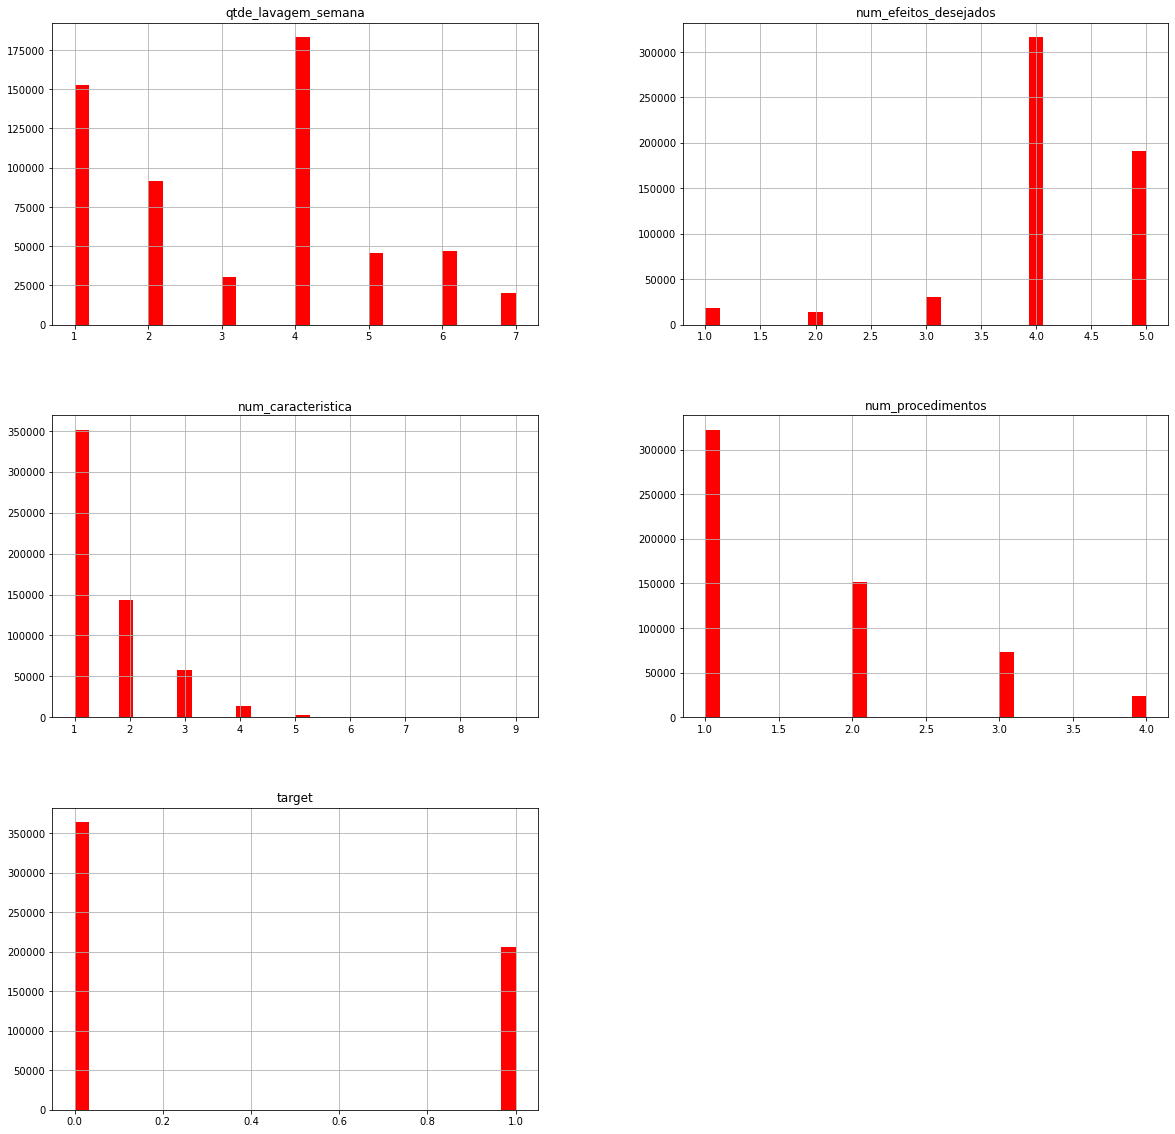

In [156]:
dados.hist(bins = 30, figsize=(20,20), color = 'r');

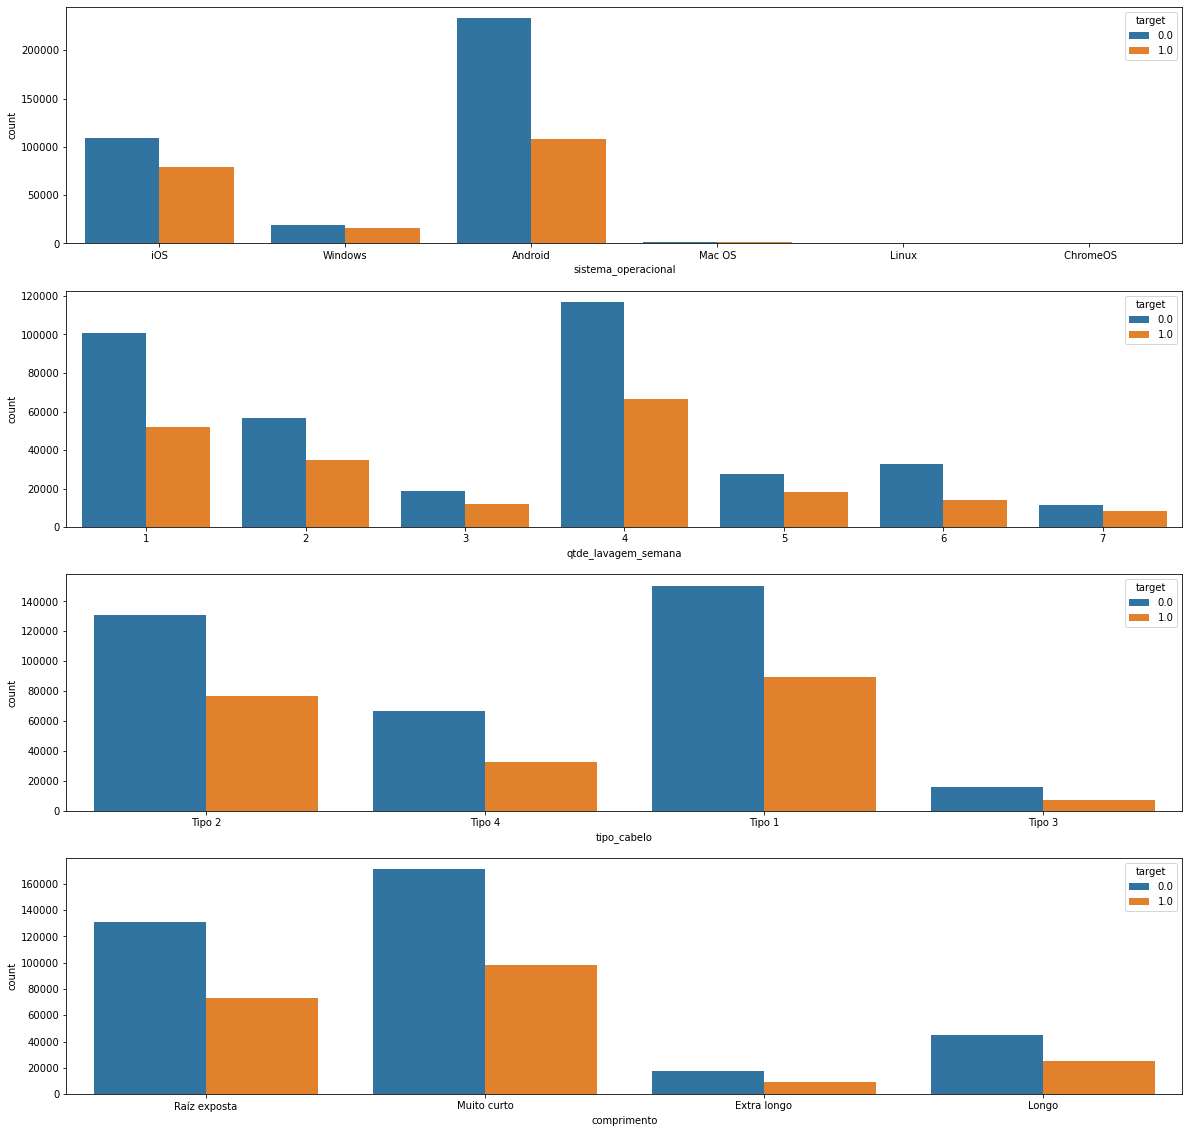

In [157]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'sistema_operacional', hue = 'target', data=dados)
plt.subplot(412)
sns.countplot(x = 'qtde_lavagem_semana', hue = 'target', data=dados)
plt.subplot(413)
sns.countplot(x = 'tipo_cabelo', hue = 'target', data=dados)
plt.subplot(414)
sns.countplot(x = 'comprimento', hue = 'target', data=dados);

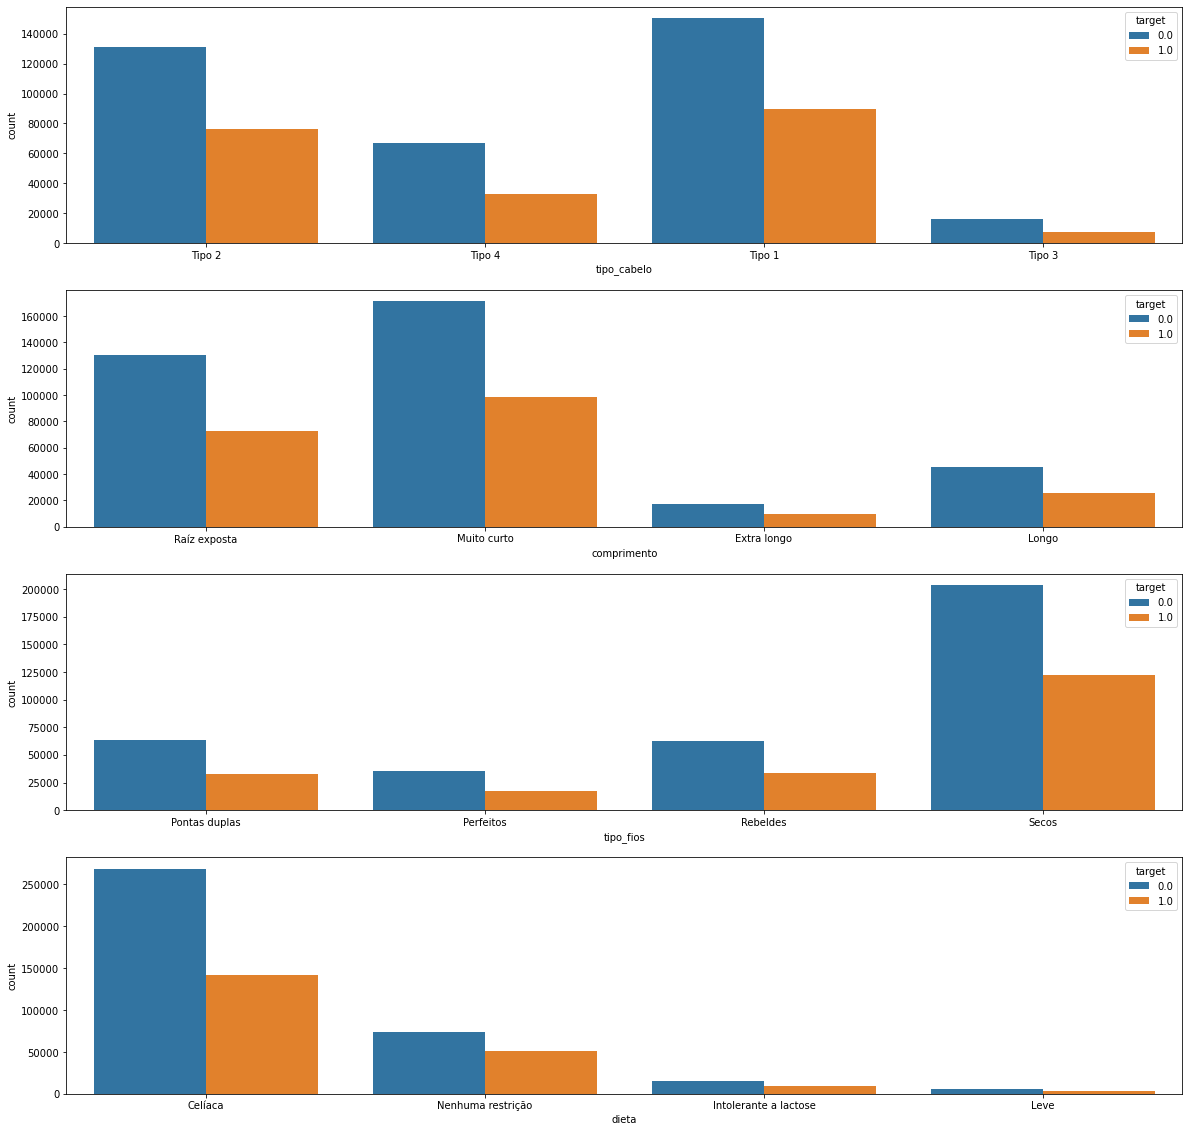

In [158]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'tipo_cabelo', hue = 'target', data=dados)
plt.subplot(412)
sns.countplot(x = 'comprimento', hue = 'target', data=dados)
plt.subplot(413)
sns.countplot(x = 'tipo_fios', hue = 'target', data=dados)
plt.subplot(414)
sns.countplot(x = 'dieta', hue = 'target', data=dados);

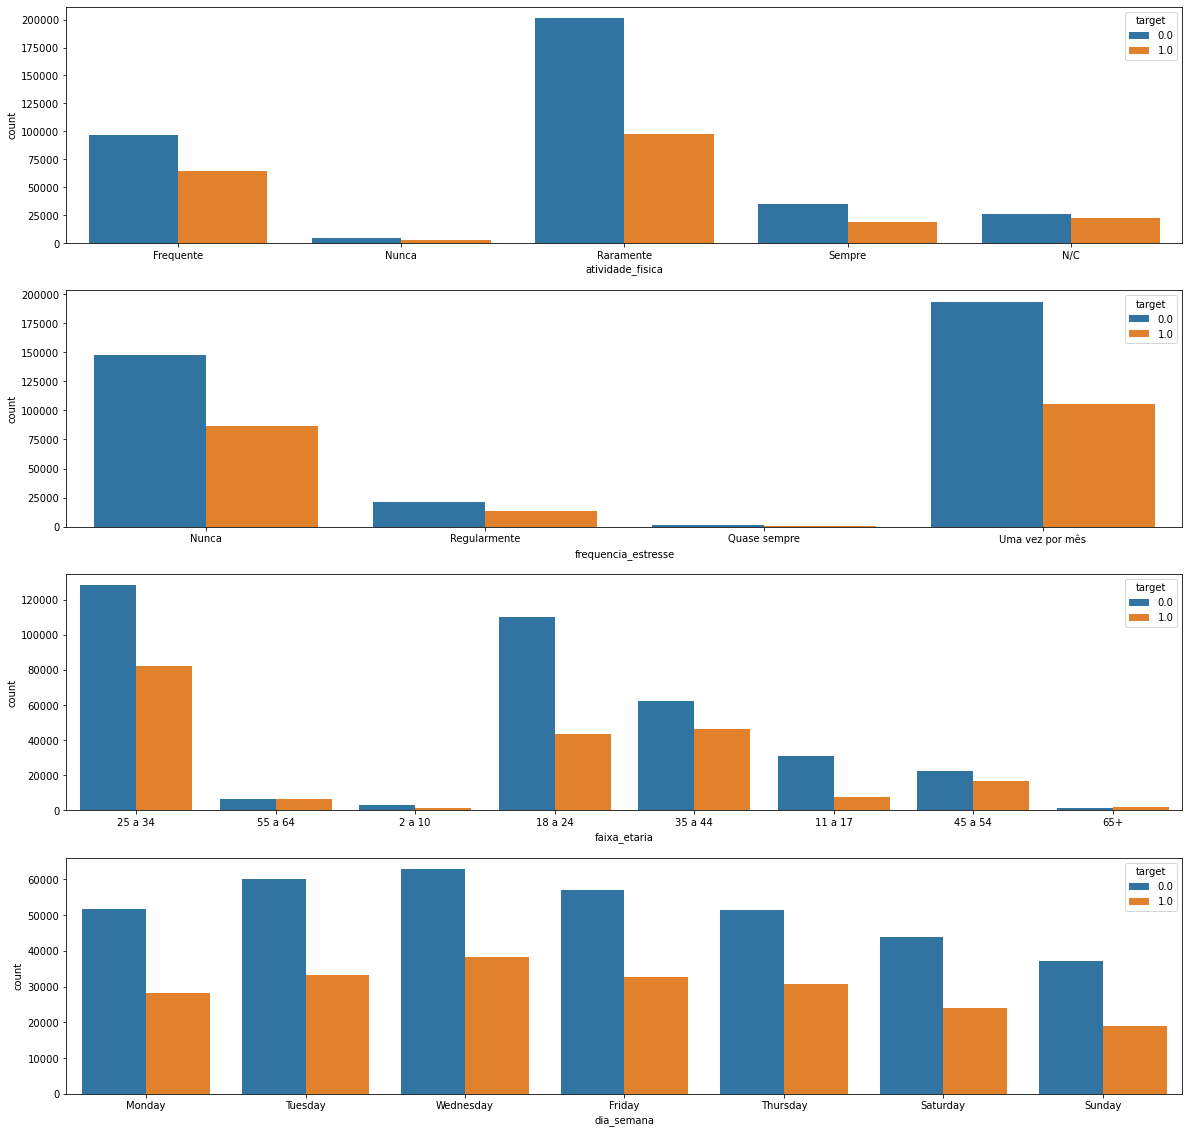

In [159]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'atividade_fisica', hue = 'target', data=dados)
plt.subplot(412)
sns.countplot(x = 'frequencia_estresse', hue = 'target', data=dados)
plt.subplot(413)
sns.countplot(x = 'faixa_etaria', hue = 'target', data=dados)
plt.subplot(414)
sns.countplot(x = 'dia_semana', hue = 'target', data=dados);

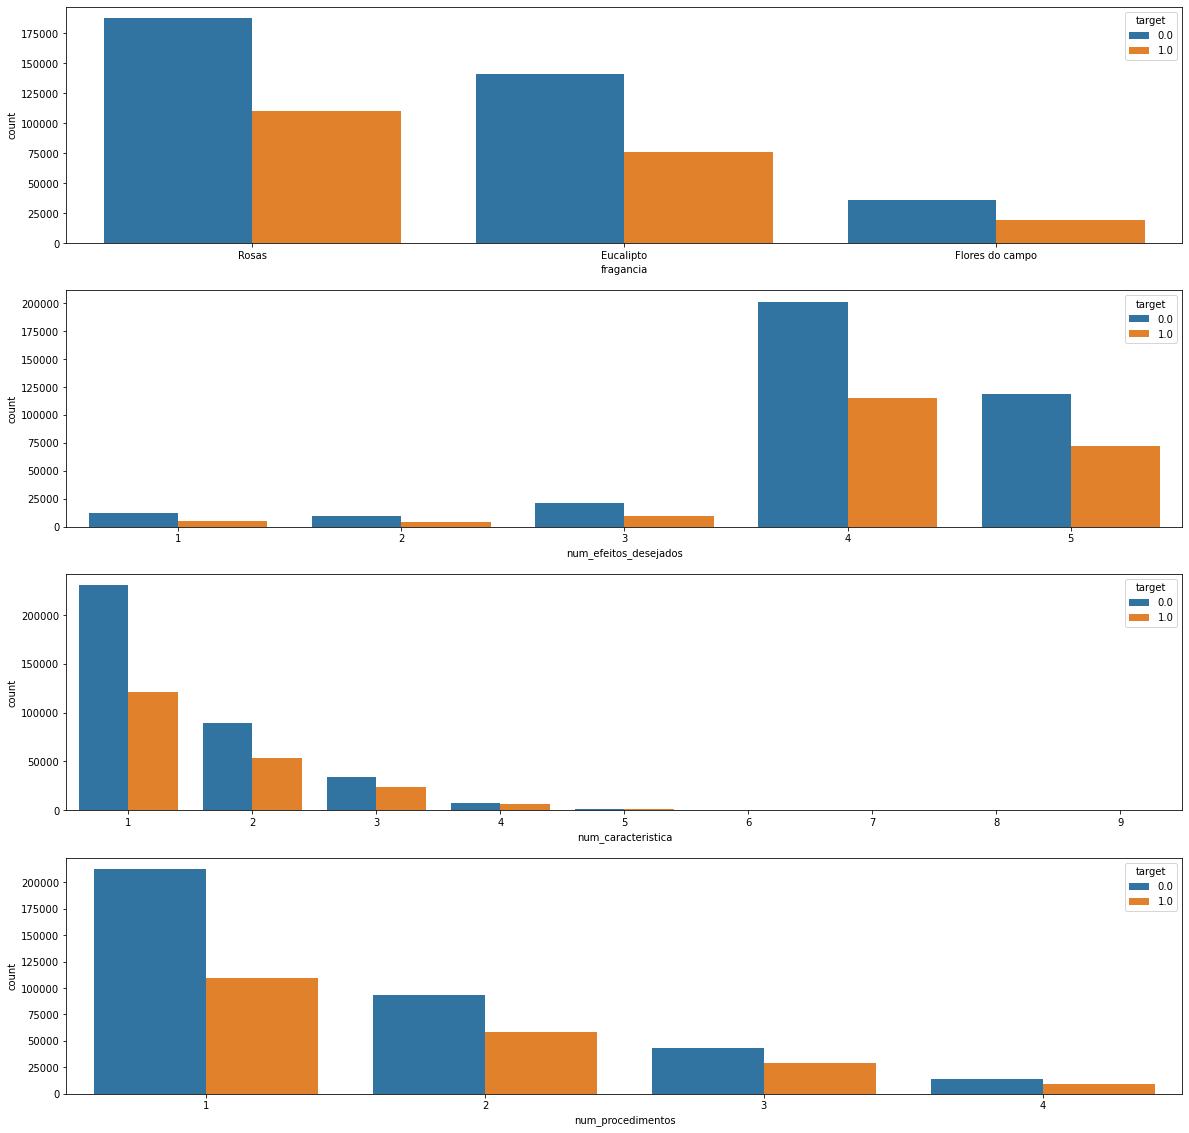

In [160]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'fragancia', hue = 'target', data=dados)
plt.subplot(412)
sns.countplot(x = 'num_efeitos_desejados', hue = 'target', data=dados)
plt.subplot(413)
sns.countplot(x = 'num_caracteristica', hue = 'target', data=dados)
plt.subplot(414)
sns.countplot(x = 'num_procedimentos', hue = 'target', data=dados);

### Tratamento dos dados

In [161]:
dados.head()

,sistema_operacional,estado,qtde_lavagem_semana,tipo_cabelo,comprimento,tipo_fios,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,faixa_etaria,fragancia,dia_semana,num_efeitos_desejados,num_caracteristica,num_procedimentos,target
0,iOS,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1,1.0
1,iOS,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1,1.0
2,iOS,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1,1.0
3,iOS,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1,1.0
4,Windows,SAO PAULO,7,Tipo 4,Muito curto,Perfeitos,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,55 a 64,Eucalipto,Tuesday,1,1,1,0.0


### Pre processamento dos dados

In [162]:
X_cat = dados[['estado', 'tipo_cabelo',
       'comprimento', 'tipo_fios', 'tempo_procedimento', 'dieta',
       'atividade_fisica', 'frequencia_estresse', 'faixa_etaria', 'fragancia']]
#removendo o sistema operacional: não influencia no resultado

In [163]:
X_cat.columns

Index(['estado', 'tipo_cabelo', 'comprimento', 'tipo_fios',
       'tempo_procedimento', 'dieta', 'atividade_fisica',
       'frequencia_estresse', 'faixa_etaria', 'fragancia'],
      dtype='object')

In [164]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(X_cat)

enc.categories_

X_categ = enc.transform(X_cat).toarray()


In [165]:
type(X_categ)

numpy.ndarray

In [166]:
#X_columns = encoder.get_feature_names_out(input_features = X_cat.columns)


In [167]:
X_encoder = pd.DataFrame(X_categ, columns = enc.get_feature_names_out(X_cat.columns))

In [168]:
X_encoder.head()

,estado_ ACRE,estado_ ALAGOAS,estado_ AMAPA,estado_ AMAZONAS,estado_ BAHIA,estado_ CEARA,estado_ ESPIRITO SANTO,estado_ FEDERAL DISTRICT,estado_ GOIAS,estado_ MARANHAO,estado_ MATO GROSSO,estado_ MATO GROSSO DO SUL,estado_ MINAS GERAIS,estado_ PARA,estado_ PARANA,estado_ PARAÍBA,estado_ PERNAMBUCO,estado_ PIAUI,estado_ RIO DE JANEIRO,estado_ RIO GRANDE DO NORTE,estado_ RIO GRANDE DO SUL,estado_ RONDONIA,estado_ SANTA CATARINA,estado_ SAO PAULO,estado_ SERGIPE,estado_ TOCANTINS,estado_Outros,tipo_cabelo_Tipo 1,tipo_cabelo_Tipo 2,tipo_cabelo_Tipo 3,tipo_cabelo_Tipo 4,comprimento_Extra longo,comprimento_Longo,comprimento_Muito curto,comprimento_Raíz exposta,tipo_fios_Perfeitos,tipo_fios_Pontas duplas,tipo_fios_Rebeldes,tipo_fios_Secos,tempo_procedimento_Há 1 mês,tempo_procedimento_Há 1 semana,tempo_procedimento_Há 2 semanas,tempo_procedimento_Há mais de 1 mês,tempo_procedimento_Não houve procedimentos,dieta_Celíaca,dieta_Intolerante a lactose,dieta_Leve,dieta_Nenhuma restrição,atividade_fisica_Frequente,atividade_fisica_N/C,atividade_fisica_Nunca,atividade_fisica_Raramente,atividade_fisica_Sempre,frequencia_estresse_Nunca,frequencia_estresse_Quase sempre,frequencia_estresse_Regularmente,frequencia_estresse_Uma vez por mês,faixa_etaria_11 a 17,faixa_etaria_18 a 24,faixa_etaria_2 a 10,faixa_etaria_25 a 34,faixa_etaria_35 a 44,faixa_etaria_45 a 54,faixa_etaria_55 a 64,faixa_etaria_65+,fragancia_Eucalipto,fragancia_Flores do campo,fragancia_Rosas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [169]:
X_numerico = dados[['qtde_lavagem_semana', 'num_efeitos_desejados',
       'num_caracteristica','num_procedimentos']]

In [170]:
X_df = pd.concat([X_encoder, X_numerico], axis = 1)

In [171]:
X_df.shape

(570150, 72)

In [172]:
type(X_df)

pandas.core.frame.DataFrame

In [173]:
y = dados.target

In [174]:
#normalizando os dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_df)

In [175]:
from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state = SEED)

In [176]:
#importando as métricas
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [177]:
#importando a matriz de confusão
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
#importando a Curva ROC e AOC
from sklearn.metrics import roc_curve, roc_auc_score


Acurácia: 0.919
Precisão: 0.87
Recall: 0.911
F1: 0.913
------------------------------------------------------------------------------------------------------------------------


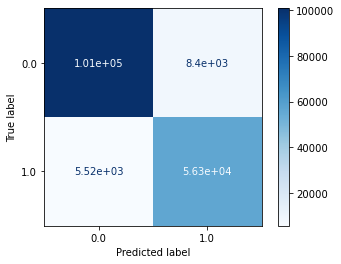

roc_auc: 0.953


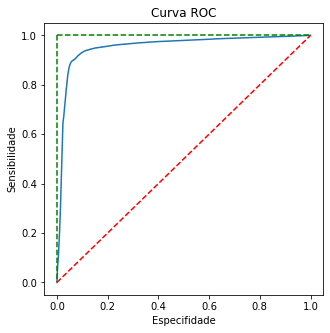

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94    109222
         1.0       0.87      0.91      0.89     61823

    accuracy                           0.92    171045
   macro avg       0.91      0.92      0.91    171045
weighted avg       0.92      0.92      0.92    171045



In [178]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()

model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print("Acurácia: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precisão: {:.3}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.3}".format(metrics.recall_score(y_test, y_pred))) 
print("F1: {:.3}".format(metrics.f1_score(y_test, y_pred, average='macro')))
print('--'*60)

    
cm = plot_confusion_matrix(model1, X_test, y_test, cmap='Blues', values_format = '.3g')
plt.show()
    
prob_previsao = model1.predict_proba(X_test)[:,1] #probabilidade do evento ser predito como 0 ou 1 - uma matriz com 2 colunas

    #tfp = taxa falsos positivos
    #tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(y_test, prob_previsao)
print('roc_auc: {:.3}'.format(roc_auc_score(y_test, prob_previsao)))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

print(classification_report(y_test, y_pred))

In [179]:
for name, importance in zip(X_df.columns, model1.feature_importances_):
    print(name, "=", importance*100)

estado_ ACRE = 0.09549424887761342
estado_ ALAGOAS = 0.4400937026859891
estado_ AMAPA = 0.07146457903200981
estado_ AMAZONAS = 0.41561244874393527
estado_ BAHIA = 0.9451915372296708
estado_ CEARA = 0.8797245041084543
estado_ ESPIRITO SANTO = 0.5272234249660784
estado_ FEDERAL DISTRICT = 0.7219274377766837
estado_ GOIAS = 0.8412901722008947
estado_ MARANHAO = 0.47014706152546887
estado_ MATO GROSSO = 0.5441058277193802
estado_ MATO GROSSO DO SUL = 0.49412194177513874
estado_ MINAS GERAIS = 1.629192360730074
estado_ PARA = 0.549607683723148
estado_ PARANA = 1.3447598518157073
estado_ PARAÍBA = 0.42096479914857976
estado_ PERNAMBUCO = 0.8872330583371406
estado_ PIAUI = 0.2568760769936531
estado_ RIO DE JANEIRO = 1.4788044238240705
estado_ RIO GRANDE DO NORTE = 0.4207603750012072
estado_ RIO GRANDE DO SUL = 1.1611816026464863
estado_ RONDONIA = 0.2752443224067724
estado_ SANTA CATARINA = 1.1238276396190123
estado_ SAO PAULO = 2.1945625623017806
estado_ SERGIPE = 0.3144856169762578
estado_ 

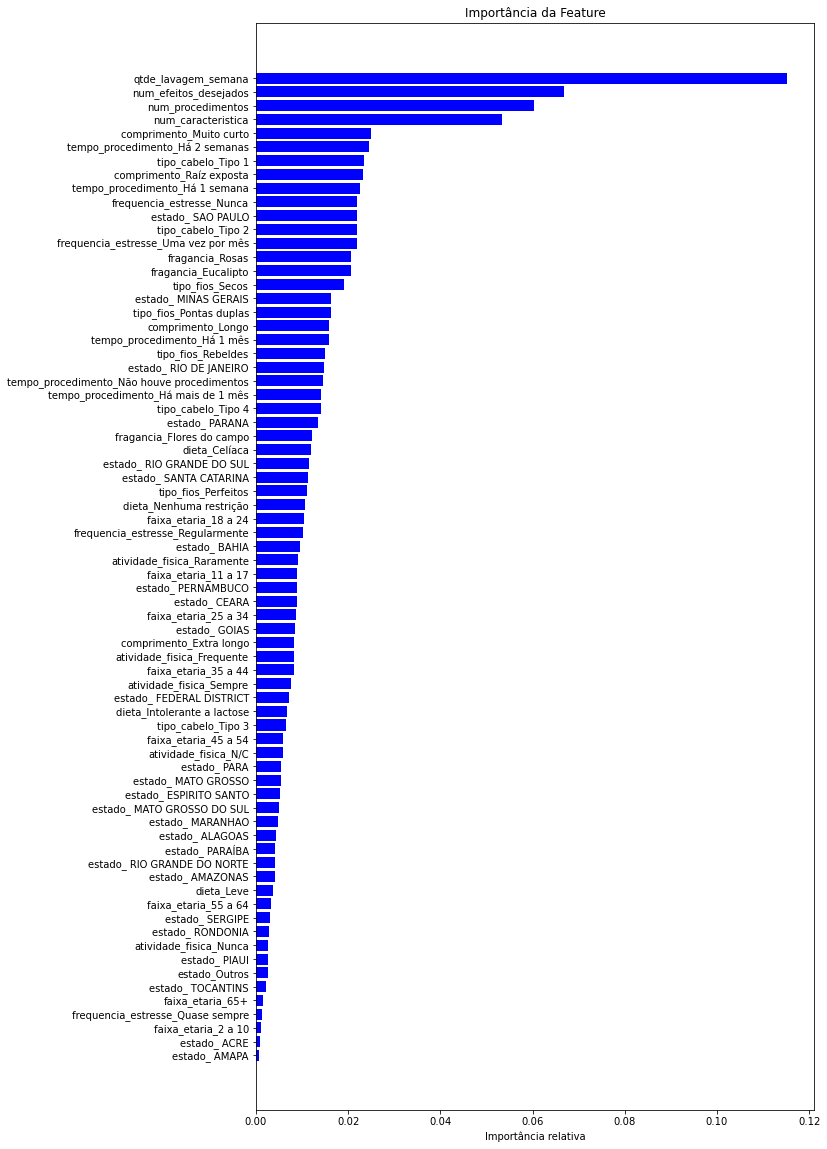

In [180]:
features = X_df.columns
importancia = model1.feature_importances_
indices = np.argsort(importancia)

ax = plt.figure(figsize=(10,20))
plt.title('Importância da Feature')
plt.barh(range(len(indices)), importancia[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importância relativa')
plt.show()

In [181]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(model1, X, y, cv=cv)

array([0.91984565, 0.9182262 , 0.92014382, 0.91848344, 0.91791049])

In [182]:
#alterando os hiperparâmetros do modelo Random Forest
#o resultado está em comentário pois ficou abaixo do model1
'''model2 = RandomForestClassifier(n_estimators=75, criterion='gini', max_depth=32)

model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print("Acurácia: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precisão: {:.3}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.3}".format(metrics.recall_score(y_test, y_pred))) 
print("F1: {:.3}".format(metrics.f1_score(y_test, y_pred, average='macro')))
print('--'*60)

cm = plot_confusion_matrix(model2, X_test, y_test, cmap='Blues', values_format = '.3g')
plt.show()
    
prob_previsao = model2.predict_proba(X_test)[:,1] #probabilidade do evento ser predito como 0 ou 1 - uma matriz com 2 colunas

    #tfp = taxa falsos positivos
    #tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(y_test, prob_previsao)
print('roc_auc: {:.3}'.format(roc_auc_score(y_test, prob_previsao)))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()


print(classification_report(y_test, y_pred))'''

'model2 = RandomForestClassifier(n_estimators=75, criterion=\'gini\', max_depth=32)\n\nmodel2.fit(X_train, y_train)\n\ny_pred = model2.predict(X_test)\n\nprint("Acurácia: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))\nprint("Precisão: {:.3}".format(metrics.precision_score(y_test, y_pred)))\nprint("Recall: {:.3}".format(metrics.recall_score(y_test, y_pred))) \nprint("F1: {:.3}".format(metrics.f1_score(y_test, y_pred, average=\'macro\')))\nprint(\'--\'*60)\n\ncm = plot_confusion_matrix(model2, X_test, y_test, cmap=\'Blues\', values_format = \'.3g\')\nplt.show()\n    \nprob_previsao = model2.predict_proba(X_test)[:,1] #probabilidade do evento ser predito como 0 ou 1 - uma matriz com 2 colunas\n\n    #tfp = taxa falsos positivos\n    #tvp = taxa verdadeiros positivos\n\ntfp, tvp, limite = roc_curve(y_test, prob_previsao)\nprint(\'roc_auc: {:.3}\'.format(roc_auc_score(y_test, prob_previsao)))\n\nplt.subplots(1, figsize=(5,5))\nplt.title(\'Curva ROC\')\nplt.plot(tfp,tvp)\nplt.xlabel

In [183]:
'''cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(model2, X, y, cv=cv)'''

'cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)\ncross_val_score(model2, X, y, cv=cv)'

### Salvando o classificador

In [184]:
import pickle

In [185]:
with open('modelo.pkl', 'wb') as f:
    pickle.dump([scaler, enc, model1], f)

In [186]:
with open('modelo.pkl', 'rb') as f:
    min_max, encoder, model = pickle.load(f)

In [187]:
min_max, encoder, model

(MinMaxScaler(),
 OneHotEncoder(handle_unknown='ignore'),
 RandomForestClassifier())

In [188]:
#teste com o primeiro registro da base de dados
X_novo = dados.iloc[0:1]
X_novo

,sistema_operacional,estado,qtde_lavagem_semana,tipo_cabelo,comprimento,tipo_fios,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,faixa_etaria,fragancia,dia_semana,num_efeitos_desejados,num_caracteristica,num_procedimentos,target
0,iOS,SAO PAULO,4,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas,Monday,1,1,1,1.0


In [189]:
#selecionando somente os atributos categóricos
X_cat_novo = X_novo[['estado', 'tipo_cabelo',
       'comprimento', 'tipo_fios', 'tempo_procedimento', 'dieta',
       'atividade_fisica', 'frequencia_estresse', 'faixa_etaria', 'fragancia']]
X_cat_novo

,estado,tipo_cabelo,comprimento,tipo_fios,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,faixa_etaria,fragancia
0,SAO PAULO,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,25 a 34,Rosas


In [190]:
X_cat_novo = encoder.transform(X_cat_novo).toarray()

In [191]:
X_cat_novo

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 1.]])

In [192]:
X_encoder_novo = pd.DataFrame(X_cat_novo, columns = enc.get_feature_names_out(X_cat.columns))
X_encoder_novo

,estado_ ACRE,estado_ ALAGOAS,estado_ AMAPA,estado_ AMAZONAS,estado_ BAHIA,estado_ CEARA,estado_ ESPIRITO SANTO,estado_ FEDERAL DISTRICT,estado_ GOIAS,estado_ MARANHAO,estado_ MATO GROSSO,estado_ MATO GROSSO DO SUL,estado_ MINAS GERAIS,estado_ PARA,estado_ PARANA,estado_ PARAÍBA,estado_ PERNAMBUCO,estado_ PIAUI,estado_ RIO DE JANEIRO,estado_ RIO GRANDE DO NORTE,estado_ RIO GRANDE DO SUL,estado_ RONDONIA,estado_ SANTA CATARINA,estado_ SAO PAULO,estado_ SERGIPE,estado_ TOCANTINS,estado_Outros,tipo_cabelo_Tipo 1,tipo_cabelo_Tipo 2,tipo_cabelo_Tipo 3,tipo_cabelo_Tipo 4,comprimento_Extra longo,comprimento_Longo,comprimento_Muito curto,comprimento_Raíz exposta,tipo_fios_Perfeitos,tipo_fios_Pontas duplas,tipo_fios_Rebeldes,tipo_fios_Secos,tempo_procedimento_Há 1 mês,tempo_procedimento_Há 1 semana,tempo_procedimento_Há 2 semanas,tempo_procedimento_Há mais de 1 mês,tempo_procedimento_Não houve procedimentos,dieta_Celíaca,dieta_Intolerante a lactose,dieta_Leve,dieta_Nenhuma restrição,atividade_fisica_Frequente,atividade_fisica_N/C,atividade_fisica_Nunca,atividade_fisica_Raramente,atividade_fisica_Sempre,frequencia_estresse_Nunca,frequencia_estresse_Quase sempre,frequencia_estresse_Regularmente,frequencia_estresse_Uma vez por mês,faixa_etaria_11 a 17,faixa_etaria_18 a 24,faixa_etaria_2 a 10,faixa_etaria_25 a 34,faixa_etaria_35 a 44,faixa_etaria_45 a 54,faixa_etaria_55 a 64,faixa_etaria_65+,fragancia_Eucalipto,fragancia_Flores do campo,fragancia_Rosas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [193]:
#selecionando os atributos numéricos
X_numerical_novo = X_novo[['qtde_lavagem_semana', 'num_efeitos_desejados',
       'num_caracteristica','num_procedimentos']]
X_numerical_novo

,qtde_lavagem_semana,num_efeitos_desejados,num_caracteristica,num_procedimentos
0,4,1,1,1


In [194]:
#concatenando os dados categoricos e numericos
X_all_novo = pd.concat([X_encoder_novo, X_numerical_novo], axis = 1)
X_all_novo

,estado_ ACRE,estado_ ALAGOAS,estado_ AMAPA,estado_ AMAZONAS,estado_ BAHIA,estado_ CEARA,estado_ ESPIRITO SANTO,estado_ FEDERAL DISTRICT,estado_ GOIAS,estado_ MARANHAO,estado_ MATO GROSSO,estado_ MATO GROSSO DO SUL,estado_ MINAS GERAIS,estado_ PARA,estado_ PARANA,estado_ PARAÍBA,estado_ PERNAMBUCO,estado_ PIAUI,estado_ RIO DE JANEIRO,estado_ RIO GRANDE DO NORTE,estado_ RIO GRANDE DO SUL,estado_ RONDONIA,estado_ SANTA CATARINA,estado_ SAO PAULO,estado_ SERGIPE,estado_ TOCANTINS,estado_Outros,tipo_cabelo_Tipo 1,tipo_cabelo_Tipo 2,tipo_cabelo_Tipo 3,tipo_cabelo_Tipo 4,comprimento_Extra longo,comprimento_Longo,comprimento_Muito curto,comprimento_Raíz exposta,tipo_fios_Perfeitos,tipo_fios_Pontas duplas,tipo_fios_Rebeldes,tipo_fios_Secos,tempo_procedimento_Há 1 mês,tempo_procedimento_Há 1 semana,tempo_procedimento_Há 2 semanas,tempo_procedimento_Há mais de 1 mês,tempo_procedimento_Não houve procedimentos,dieta_Celíaca,dieta_Intolerante a lactose,dieta_Leve,dieta_Nenhuma restrição,atividade_fisica_Frequente,atividade_fisica_N/C,atividade_fisica_Nunca,atividade_fisica_Raramente,atividade_fisica_Sempre,frequencia_estresse_Nunca,frequencia_estresse_Quase sempre,frequencia_estresse_Regularmente,frequencia_estresse_Uma vez por mês,faixa_etaria_11 a 17,faixa_etaria_18 a 24,faixa_etaria_2 a 10,faixa_etaria_25 a 34,faixa_etaria_35 a 44,faixa_etaria_45 a 54,faixa_etaria_55 a 64,faixa_etaria_65+,fragancia_Eucalipto,fragancia_Flores do campo,fragancia_Rosas,qtde_lavagem_semana,num_efeitos_desejados,num_caracteristica,num_procedimentos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,1,1,1


In [195]:
#colocando os dados na mesma escala com min_max, retirando o scaler
X_novo = min_max.transform(X_all_novo)
X_novo

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ,
        0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 1. , 0. , 0. ,
        0. , 0. , 1. , 0. , 0. , 1. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ,
        0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ,
        0. , 0. , 1. , 0.5, 0. , 0. , 0. ]])

In [196]:
#Predição da random forest - mostrar a classe
model.predict(X_novo)

array([1.])

In [197]:
#probabilidade
model.predict_proba(X_novo)

array([[0., 1.]])

In [198]:
#indice (classe 0 e classe 1)
model.classes_

array([0., 1.])